In [5]:
import pandas as pd

# データの読み込み
df = pd.read_csv('IF_steel_ss.csv')

# 列名の表示
print(df.columns)


Index(['time', 'Nominal strain', 'Nominal stress', 'material', 'Temperature'], dtype='object')


In [15]:
import pandas as pd

# データの読み込み
df = pd.read_csv('IF_steel_ss.csv')

# 最初の数行を表示
print(df.head())


         time  Nominal strain  Nominal stress  material  Temperature
0    0.000000        0.000000        0.000000  IF-steel          296
1   14.312749        0.000472       94.464143  IF-steel          297
2  243.694765        0.000548       96.643356  IF-steel          298
3  246.057954        0.000626       98.880404  IF-steel          299
4  479.166330        0.000703      100.825557  IF-steel          300


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31309 (\N{CJK UNIFIED IDEOGRAPH-7A4D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31639 (\N{CJK UNIFIED IDEOGRAPH-7B97}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-

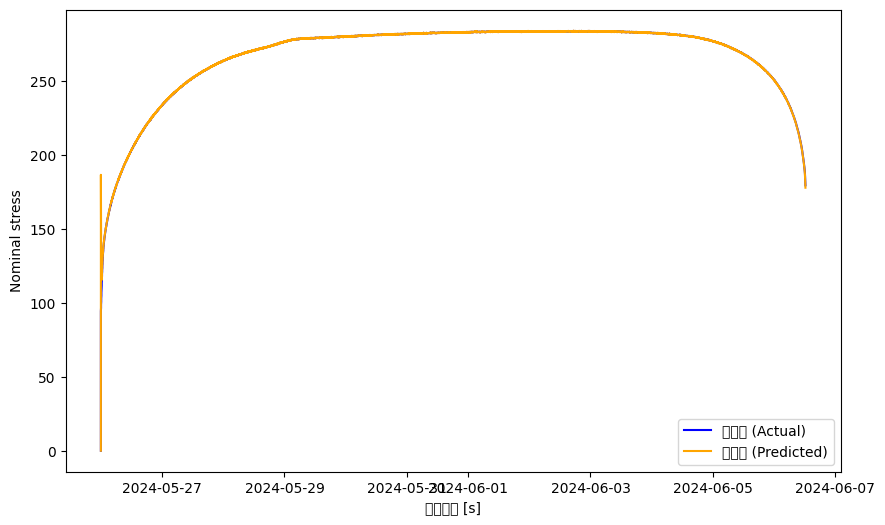

In [33]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# データの読み込み
df = pd.read_csv('IF_steel_ss.csv')

# 開始日を設定（例：2024年5月26日）
#start_date = pd.Timestamp('2024-05-26')

# time列に開始日を加えて日付と時刻に変換
df['time'] = start_date + pd.to_timedelta(df['time'], unit='s')

# 時系列データの設定
timeseries = df['Nominal stress']  # 目的変数（Nominal stress）
times = df['time']  # 時間軸（time）

# ARIMAモデルの設定と学習
model = ARIMA(timeseries, order=(1, 1, 1))  # p, d, qのパラメータは適宜調整してください
model_fit = model.fit()

# 予測結果のプロット
plt.figure(figsize=(10, 6))
plt.plot(times, timeseries, label='実測値 (Actual)', color='blue')
plt.plot(times, model_fit.predict(start=1, end=len(timeseries)), label='予測値 (Predicted)', color='orange')
plt.xlabel('積算時間 [s]')
plt.ylabel('Nominal stress')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MAE: 12.416731871048487
MSE: 502.4102941957892
RMSE: 22.414510795370692
R²: -0.14060080554884258


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31309 (\N{CJK UNIFIED IDEOGRAPH-7A4D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31639 (\N{CJK UNIFIED IDEOGRAPH-7B97}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35347 (\N{CJK UNIFIED IDEOGRAPH-8A13}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

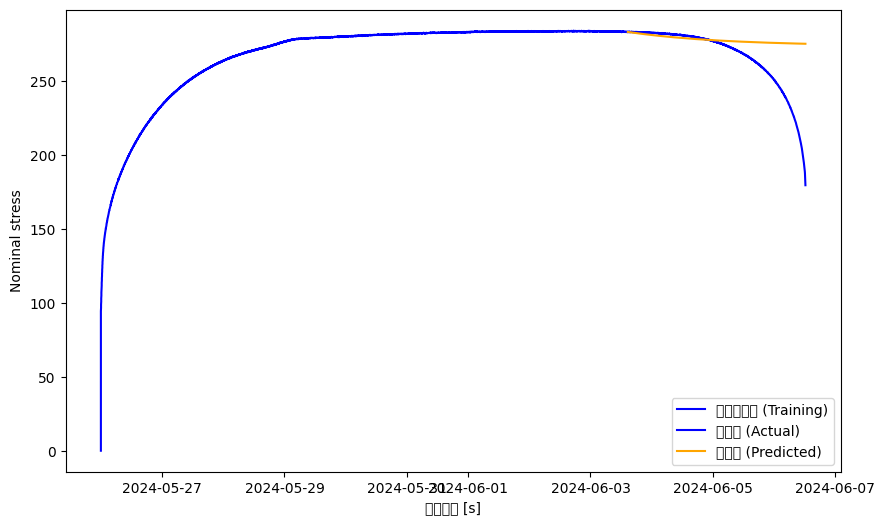

In [39]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# データの読み込み
df = pd.read_csv('IF_steel_ss.csv')

# 開始日を設定（例：2024年5月26日）
start_date = pd.Timestamp('2024-05-26')

# time列に開始日を加えて日付と時刻に変換
df['time'] = start_date + pd.to_timedelta(df['time'], unit='s')

# 時系列データの設定
timeseries = df['Nominal stress']  # 目的変数（Nominal stress）
times = df['time']  # 時間軸（time）

# データの分割（80%を訓練セット、20%をテストセット）
train_size = int(len(timeseries) * 0.8)
train, test = timeseries[:train_size], timeseries[train_size:]
train_times, test_times = times[:train_size], times[train_size:]

# ARIMAモデルの設定と学習
model = ARIMA(train, order=(1, 1, 1))  # p, d, qのパラメータは適宜調整してください
model_fit = model.fit()

# テストセットの予測
predictions = model_fit.predict(start=train_size, end=len(timeseries)-1, dynamic=False)

# 評価指標の計算
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test, predictions)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

# 予測結果のプロット
plt.figure(figsize=(10, 6))
plt.plot(train_times, train, label='訓練セット (Training)', color='blue')
plt.plot(test_times, test, label='実測値 (Actual)', color='blue')
plt.plot(test_times, predictions, label='予測値 (Predicted)', color='orange')
plt.xlabel('積算時間 [s]')
plt.ylabel('Nominal stress')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MAE: 12.416731871048487
MSE: 502.4102941957892
RMSE: 22.414510795370692
R²: -0.14060080554884258


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31309 (\N{CJK UNIFIED IDEOGRAPH-7A4D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31639 (\N{CJK UNIFIED IDEOGRAPH-7B97}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35347 (\N{CJK UNIFIED IDEOGRAPH-8A13}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

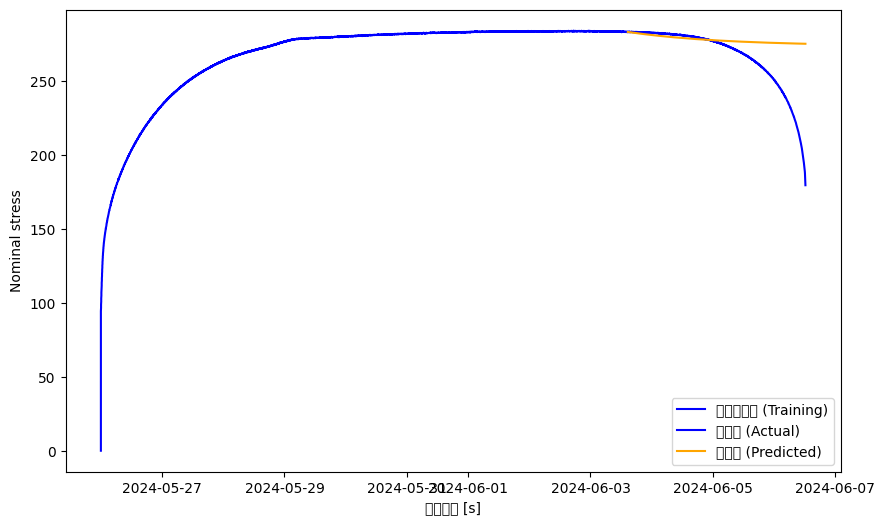

In [40]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# データの読み込み
df = pd.read_csv('IF_steel_ss.csv')

# 開始日を設定（例：2024年5月26日）
start_date = pd.Timestamp('2024-05-26')

# time列に開始日を加えて日付と時刻に変換
df['time'] = start_date + pd.to_timedelta(df['time'], unit='s')

# 時系列データの設定
timeseries = df['Nominal stress']  # 目的変数（Nominal stress）
times = df['time']  # 時間軸（time）

# データの分割（80%を訓練セット、20%をテストセット）
train_size = int(len(timeseries) * 0.8)
train, test = timeseries[:train_size], timeseries[train_size:]
train_times, test_times = times[:train_size], times[train_size:]

# ARIMAモデルの設定と学習
model = ARIMA(train, order=(1, 1, 1))  # p, d, qのパラメータは適宜調整してください
model_fit = model.fit()

# テストセットの予測
predictions = model_fit.predict(start=train_size, end=len(timeseries)-1, dynamic=False)

# 評価指標の計算
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test, predictions)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

# 予測結果のプロット
plt.figure(figsize=(10, 6))
plt.plot(train_times, train, label='訓練セット (Training)', color='blue')
plt.plot(test_times, test, label='実測値 (Actual)', color='blue')
plt.plot(test_times, predictions, label='予測値 (Predicted)', color='orange')
plt.xlabel('積算時間 [s]')
plt.ylabel('Nominal stress')
plt.legend()
plt.show()
